# Lecture 2 
## Warning: make sure you run the cells in the correct order

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [2, 2] # inches
mpl.rcParams['font.size'] = 8

# Define a function to do the most common plotting task
def xyplot(x1=None, y1=None, x2=None, y2=None, x3=None, y3=None, title=None, fname=None):
    plt.figure()
    if x1 is not None and y1 is not None:
        plt.plot(x1,y1,'b.')
    if x2 is not None and y2 is not None:
        plt.plot(x2,y2,'k-')
    if x3 is not None and y3 is not None:
        plt.plot(x3,y3,'r-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.tight_layout()
    if fname:
        plt.savefig(fname)

We now introduce a working example that we will refer to frequently. We generate data from an underlying function $y=\sin(2\pi x)$ and investigate how different methods are able to learn the trend.

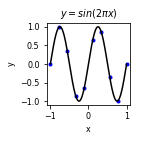

In [7]:
# First, define the function using a lambda expression because it is very simple
f = lambda x: np.sin(2*np.pi*x)
# Now we generate two datasets. One is defined on a high-resolution x-grid so we can plot the trend. The other is a lower-resolution sampling
# The trend line
x0 = np.linspace(-1,1,1000)
y0 = f(x0) # underlying function
# Low-res subsampling
x = np.linspace(-1,1,10)
y = f(x)
# Plot both
xyplot(x,y,x2=x0,y2=y0,title=r'$y=sin(2\pi x)$',fname='../figures/regression/sin.pdf')

Now we do a naive fit of different degree of polynomial to the data, using the normal equations
$$\mathbf{\Phi}^\mathrm{T}\mathbf{\Phi}\mathbf{w} = \mathbf{\Phi}^\mathrm{T}\mathbf{y}$$
where $\mathbf{\Phi}_{ij} = \phi_j(x_i)$, basis function $\phi_j$ evaluated at data point $x_i$.

0 &  0.00
1 &  0.00 & -0.29
2 &  0.00 & -0.29 & -0.00
3 &  0.00 & -0.07 & -0.00 & -0.31
4 &  0.00 & -0.07 &  0.00 & -0.31 & -0.00
5 &  0.00 &  3.85 & -0.00 & -16.51 &  0.00 & 12.69
6 &  0.00 &  3.85 & -0.00 & -16.51 &  0.00 & 12.69 & -0.00
7 & -0.00 &  6.00 &  0.00 & -35.84 & -0.00 & 54.04 &  0.00 & -24.20
8 & -0.00 &  6.00 &  0.00 & -35.84 & -0.00 & 54.04 &  0.00 & -24.20 & -0.00
9 & -0.00 &  6.28 &  0.00 & -41.12 & -0.00 & 78.61 &  0.00 & -63.77 & -0.00 & 20.00


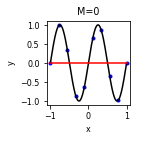

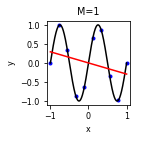

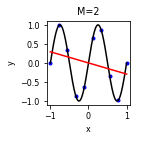

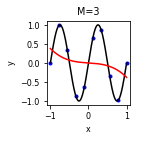

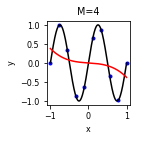

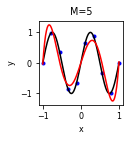

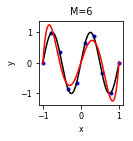

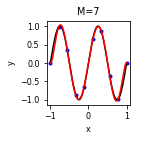

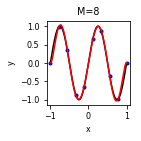

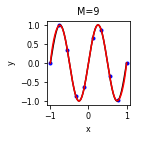

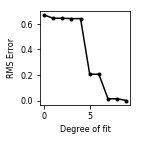

In [8]:
# Maximum degree of fit
M = 10
# Empty list to record the RMS errors
rsq = []
# Empty list to record the weights for each regression run
weights = []
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial
    hiPhi = np.array([pow(x0,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(y-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    xyplot(x, y, x2=x0, y2=y0, x3=x0, y3=np.matmul(hiPhi,w), title='M='+str(i), fname='../figures/regression/sin-M'+str(i)+'.pdf')
# Plot the error curve
plt.figure()
plt.plot(rsq,'k.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('../figures/regression/sin-rms.pdf')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.2f}'.format(i) for i in w]))

We now add some random noise to the data and repeat

 0.09
 0.09 & -0.23
-0.05 & -0.23 &  0.36
-0.05 & -0.17 &  0.36 & -0.09
 0.12 & -0.17 & -1.12 & -0.09 &  1.47
 0.12 &  3.60 & -1.12 & -15.71 &  1.47 & 12.25
-0.10 &  3.60 &  3.23 & -15.71 & -10.59 & 12.25 &  7.99
-0.10 &  7.23 &  3.23 & -48.30 & -10.59 & 81.96 &  7.99 & -40.80
-0.66 &  7.23 & 25.62 & -48.30 & -143.29 & 81.96 & 246.74 & -40.80 & -127.91
-0.66 & 10.98 & 25.62 & -117.80 & -143.29 & 405.10 & 246.74 & -561.32 & -127.91 & 263.12


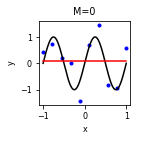

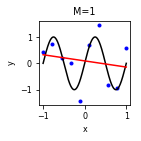

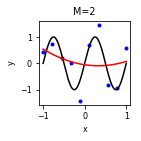

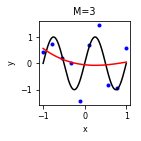

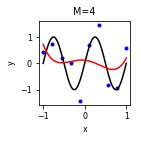

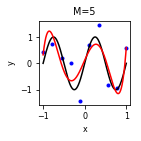

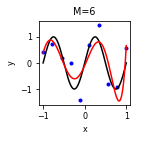

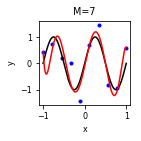

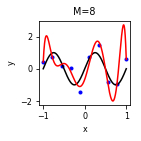

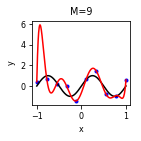

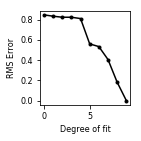

In [9]:
# Add the random noise
np.random.seed(123123)
y = f(x) + 0.5*np.random.randn(x.size)
# Maximum degree of fit
M = 10
# Empty list to record the RMS errors
rsq = []
# Empty list to record the weights for each regression run
weights = []
# For each degree of polynomaial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial
    hiPhi = np.array([pow(x0,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error    
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(y-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    xyplot(x, y, x2=x0, y2=y0, x3=x0, y3=np.matmul(hiPhi,w), title='M='+str(i), fname='../figures/regression/sin-noisy-M'+str(i)+'.pdf')
# Plot the error curve
plt.figure()
plt.plot(rsq,'k.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('../figures/regression/sin-noisy-rms.pdf')
# Print out the weights
for w in weights:
    print(' & '.join(['{:5.2f}'.format(i) for i in w]))

Repeat for a different realisation of noise

 0.06
 0.06 &  0.04
-0.04 &  0.04 &  0.25
-0.04 &  0.04 &  0.25 & -0.01
-0.20 &  0.04 &  1.59 & -0.01 & -1.33
-0.20 &  3.71 &  1.59 & -15.17 & -1.33 & 11.88
-0.21 &  3.71 &  1.78 & -15.17 & -1.87 & 11.88 &  0.36
-0.21 &  4.70 &  1.78 & -24.09 & -1.87 & 30.98 &  0.36 & -11.17
-0.39 &  4.70 &  9.10 & -24.09 & -45.21 & 30.98 & 78.34 & -11.17 & -41.77
-0.39 &  1.87 &  9.10 & 28.36 & -45.21 & -212.91 & 78.34 & 381.68 & -41.77 & -198.59


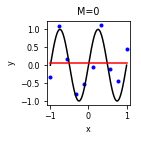

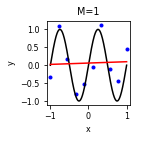

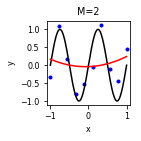

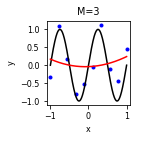

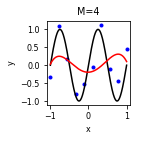

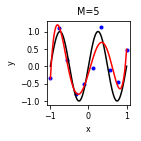

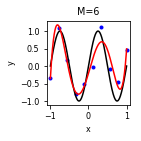

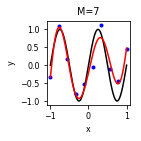

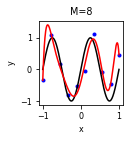

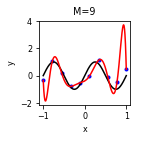

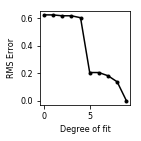

In [10]:
# Add the random noise
np.random.seed(3123123)
y = f(x) + 0.5*np.random.randn(x.size)
# Maximum degree of fit
M = 10
# Empty list to record the RMS errors
rsq = []
# Empty list to record the weights for each regression run
weights = []
# For each degree of polynomaial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial
    hiPhi = np.array([pow(x0,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error    
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(y-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    xyplot(x, y, x2=x0, y2=y0, x3=x0, y3=np.matmul(hiPhi,w), title='M='+str(i), fname='../figures/regression/sin-noisy-2-M'+str(i)+'.pdf')

# Plot the error curve
plt.figure()
plt.plot(rsq,'k.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('../figures/regression/sin-noisy-2-rms.pdf')
# Print out the weights
for w in weights:
    print(' & '.join(['{:5.2f}'.format(i) for i in w]))